### Persiapan Data

#### 01. Import Library

In [31]:
# EDA
import pandas as pd
import numpy as np

In [32]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Text Cleaning
import neattext.functions as nfx

In [34]:
# Analisa Kalimat
from textblob import TextBlob as tb

In [35]:
# Machine Learning
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
# Library Lainnya
from collections import Counter

#### 02. Load Data

In [37]:
# Membaca Dataset Berisi
dataset = pd.read_csv("Dataset Babak Penyisihan.csv")
dataset

,label,tweet
0,fear,Lebih menyeramkan kalo punya grup WA keluarga ...
1,joy,"Hepibesdey canteeeekk [USERNAME] panjang umur,..."
2,joy,Jumat lalu nonton inih! Selain tertarik settin...
3,joy,Nyante dulu.. Sruput kopi biar tambah bijak...
4,love,Happy annyversarry yg pertama kalinya .. Trsra...
...,...,...
5148,NaN,Aku termasuk orang yang tidak habis pikir deng...
5149,NaN,"Melawan sibuk Selasamu, jangan patah semangat ..."
5150,NaN,Momen di mana kamu merasa begitu mendalam terh...
5151,NaN,Tapi tentunya secara ini Bekasi ada hal-hal yg...


In [38]:
# Membuat Dataset Berisi dan Prediksi Terpisah
dataset_berisi = dataset.dropna(how = "any").reset_index(drop = True)
dataset_prediksi = dataset[dataset.isnull().any(axis = 1)].reset_index(drop = True)

#### 03. Data Cleaning

In [39]:
# Data Cleaning Column "tweet" dari dataset_prediksi
dataset_prediksi.dropna(subset = ["tweet"], inplace = True)
dataset_prediksi.reset_index(drop=True, inplace=True)

# Stopwords (Menghapus Kata Tidak Penting, seperti a, the, dll)
dataset_prediksi["teks_bersih"] = dataset_prediksi["tweet"].apply(nfx.remove_stopwords)

# Menghapus Kata [USERNAME]
dataset_prediksi["teks_bersih"] = dataset_prediksi['teks_bersih'].str.replace(r"\[USERNAME]", "")

# Menghapus koma, titik, dan lain lain
dataset_prediksi["teks_bersih"] = dataset_prediksi["teks_bersih"].apply(nfx.remove_punctuations)

# Menghapus Emoji
dataset_prediksi["teks_bersih"] = dataset_prediksi["teks_bersih"].apply(nfx.remove_emojis)

# Menghapus Lainnya Yang Tidak Perlu
dataset_prediksi["teks_bersih"] = dataset_prediksi["teks_bersih"].apply(nfx.remove_userhandles)
dataset_prediksi["teks_bersih"] = dataset_prediksi["teks_bersih"].apply(nfx.remove_special_characters)
dataset_prediksi["teks_bersih"] = dataset_prediksi["teks_bersih"].apply(nfx.remove_non_ascii)

dataset_prediksi

C:\Users\Reihan\AppData\Local\Temp/ipykernel_15940/913541779.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset_prediksi["teks_bersih"] = dataset_prediksi['teks_bersih'].str.replace(r"\[USERNAME]", "")


,label,tweet,teks_bersih
0,NaN,Saya taKan raguKan besarNya kasih sayang Tuhan...,Saya taKan raguKan besarNya kasih sayang Tuhan...
1,NaN,Cc in ke cebong2 dungu... Maksd hati pengen ca...,Cc ke cebong2 dungu Maksd hati pengen cari kes...
2,NaN,"Nah, yg keterlaluan adl kalo ada pjbt eselon y...",Nah yg keterlaluan adl kalo ada pjbt eselon yg...
3,NaN,Melody masih membatasi diri ala member ya? Yan...,Melody masih membatasi diri ala member ya Yang...
4,NaN,Rasa amarah ini membuatku merasa seperti aku a...,Rasa amarah ini membuatku merasa seperti aku a...
...,...,...,...
995,NaN,Aku termasuk orang yang tidak habis pikir deng...,Aku termasuk orang yang tidak habis pikir deng...
996,NaN,"Melawan sibuk Selasamu, jangan patah semangat ...",Melawan sibuk Selasamu jangan patah semangat yah
997,NaN,Momen di mana kamu merasa begitu mendalam terh...,Momen di mana kamu merasa begitu mendalam terh...
998,NaN,Tapi tentunya secara ini Bekasi ada hal-hal yg...,Tapi tentunya secara ini Bekasi ada halhal yg ...


In [40]:
# Data Cleaning Column "tweet" dari dataset_berisi
# Stopwords (Menghapus Kata Tidak Penting, seperti a, the, dll)
dataset_berisi["teks_bersih"] = dataset_berisi["tweet"].apply(nfx.remove_stopwords)

# Menghapus Kata [USERNAME]
dataset_berisi["teks_bersih"] = dataset_berisi['teks_bersih'].str.replace(r"\[USERNAME]", "")

# Menghapus koma, titik, dan lain lain
dataset_berisi["teks_bersih"] = dataset_berisi["teks_bersih"].apply(nfx.remove_punctuations)

# Menghapus Emoji
dataset_berisi["teks_bersih"] = dataset_berisi["teks_bersih"].apply(nfx.remove_emojis) 

# Menghapus Lainnya Yang Tidak Perlu
dataset_berisi["teks_bersih"] = dataset_berisi["teks_bersih"].apply(nfx.remove_userhandles)
dataset_berisi["teks_bersih"] = dataset_berisi["teks_bersih"].apply(nfx.remove_special_characters)
dataset_berisi["teks_bersih"] = dataset_berisi["teks_bersih"].apply(nfx.remove_non_ascii)

dataset_berisi


C:\Users\Reihan\AppData\Local\Temp/ipykernel_15940/988333499.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset_berisi["teks_bersih"] = dataset_berisi['teks_bersih'].str.replace(r"\[USERNAME]", "")


,label,tweet,teks_bersih
0,fear,Lebih menyeramkan kalo punya grup WA keluarga ...,Lebih menyeramkan kalo punya grup WA keluarga ...
1,joy,"Hepibesdey canteeeekk [USERNAME] panjang umur,...",Hepibesdey canteeeekk panjang umur jadi priba...
2,joy,Jumat lalu nonton inih! Selain tertarik settin...,Jumat lalu nonton inih Selain tertarik setting...
3,joy,Nyante dulu.. Sruput kopi biar tambah bijak...,Nyante dulu Sruput kopi biar tambah bijak
4,love,Happy annyversarry yg pertama kalinya .. Trsra...,Happy annyversarry yg pertama kalinya Trsrah ...
...,...,...,...
4146,anger,sini berobat sama saya ini ngantri dokter saja...,sini berobat sama saya ini ngantri dokter saja...
4147,joy,Selamat pagi generasi Tik Tok yang kadang kepa...,Selamat pagi generasi Tik Tok yang kadang kepa...
4148,love,"Salah satu sahabat terbaik! Teman, kakak, insp...",Salah satu sahabat terbaik Teman kakak inspira...
4149,anger,[USERNAME] Gila kok ada ya perempuan pikiranny...,Gila kok ada ya perempuan pikirannya malah ny...


### Pemrosesan Data

In [41]:
# Banyak label emotion
dataset_berisi["label"].value_counts()

sadness    1122
joy        1002
anger       875
fear        654
love        498
Name: label, dtype: int64

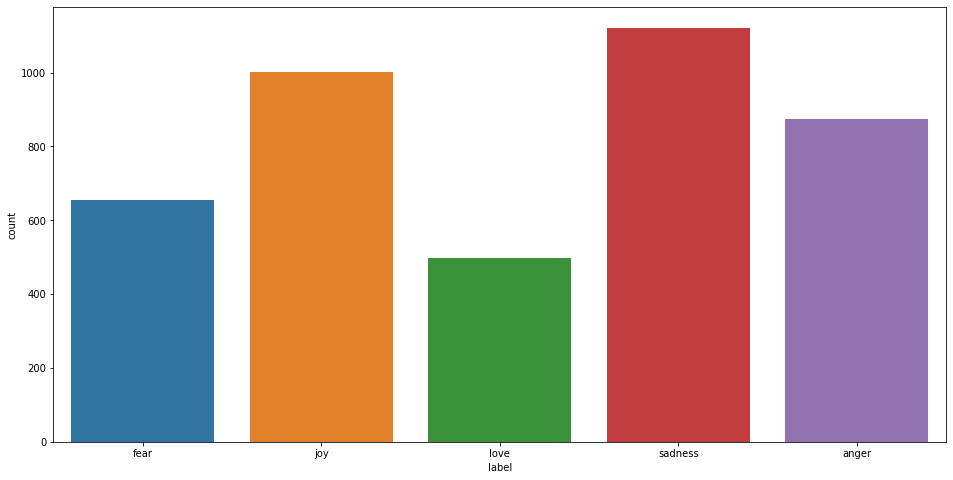

In [42]:
# Grafik bar dari banyaknya label emoticon
plt.figure(figsize=(16,8))
sns.countplot(x="label", data=dataset_berisi)
plt.show()

In [43]:
# Analisis sentimen
def sentimen(text):
    blob = tb(text)
    blob = blob.translate(from_lang='in', to='en')
    sentimen = blob.sentiment.polarity
    if sentimen > 0:
        return "Positif"
    elif sentimen < 0:
        return "Negatif"
    else:
        return "Netral"

In [44]:
# Fungsi ekstrak_keyword
def ekstrak_keyword(text, n = 50):
    token = [ token for token in text.split()]
    token_umum = Counter(token).most_common(n)
    return dict(token_umum)


In [45]:
# label_list
label_list = dataset_berisi['label'].unique().tolist()
label_list

['fear', 'joy', 'love', 'sadness', 'anger']

In [46]:
# Mengelompokkan semua kata dengan emotion "fear"
fear_list = dataset_berisi[dataset_berisi['label'] == label_list[0]]['teks_bersih'].tolist()
fear_doc = ' '.join(fear_list)
keyword_fear = ekstrak_keyword(fear_doc)
fear_doc

'Lebih menyeramkan kalo punya grup WA keluarga yg isinya sharing2 hadist  ayat AlQuran DAN grup WA lingkungan paroki gereja Serem kalo salah reply Ya gimana Diajak jalan aja gatau kenapa suka ada rasa takut Seringnya nolak Mungkin itu yang membuatku ga pernah bertahan lama hubungannya  ga pernah nyampe sebulan Eee e e kalo di imvu sih paling lama berapa yak Ya sama agun itu 3 bulan sama 2 bulan Hmmm Aku dulu nemu ig nya dia Pas dia lg liat camera gitu serem dah Itu gatau pake softlens atau gimana tapi matanya tuh jd gede bgt Entah gatau kenapa semakin bertambahnya umur malah semakin takut pacaran takut dikhianati ya semacam itu lah Tidak disemua tempat kita boleh melaksanakan sholat salah satunya di bangunan yang didirikan untuk kekafiran salah satunya gereja Aku berlindung kepada ALLAAH SWT dari godaan setan yang terkutuk rlt minta saran dong akukan pesen sepatu PO gitu nah biasanya datengnya seminggu 2minggu tapi ini udah lebih dari sebulan sepatunya ga dateng22 yaa belom bayar sih c

In [47]:
# Mengelompokkan semua kata dengan emotion "joy"
joy_list = dataset_berisi[dataset_berisi['label'] == label_list[1]]['teks_bersih'].tolist()
joy_doc = ' '.join(joy_list)
keyword_joy = ekstrak_keyword(joy_doc)
joy_doc

'Hepibesdey canteeeekk  panjang umur jadi pribadi yang jauh lebih baik semoga apa yang di citacitakan terwujud dan langgeng sama  Jumat lalu nonton inih Selain tertarik settingnya yg di Jogja aku penasaran stlh baca bahaya laten acak2 rambut di review Kak  Dan emang bagus banget Mata sembab gak karuan Nonton yuk mumpung masih tayang Nyante dulu Sruput kopi biar tambah bijak Penyelamat saat laper ya cuma Pop Mie sob Enaknya bikin nagih dan ga bikin baper Makanya kuy nyetok Pop Mie dari sekarang biar serunya lanjut terus URL Belajar bilang Alhamdulillah kalo dikasih masa masa yang sulit Alhamdulillah Allah masih sayang makanya diuji Alhamdulillah diingetinnya di dunia biar di akhirat gak masuk neraka Sedap betul Matur nuwun pak Heru Sudjatmoko atas pengabdian dan pelayanan panjenengan terhadap Jawa Tengah Semoga selalu diberikan kesehatan umur panjang dan sukses selalu kagem panjenengan tegaklurus satukomando URL Mau kirim salam buat  yang makin hari makin nyantol di hati salam jg buat o

### Machine Learning